<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B/TSML_14_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
#weekly_closings_of_the_dowjones = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
#daily_total_female_births_in_cal = pd.read_csv("daily-total-female-births-in-cal.csv")
#international_airline_passengers = pd.read_csv("international-airline-passengers.csv")
#mean_monthly_air_temperature_deg = pd.read_csv("mean-monthly-air-temperature-deg.csv")
#monthly_boston_armed_robberies_j = pd.read_csv("monthly-boston-armed-robberies-j.csv")
#monthly_sales_of_company_x_jan_6 = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
series_1 = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
series_2 = pd.read_csv("daily-total-female-births-in-cal.csv")['Count']
series_3 = pd.read_csv("international-airline-passengers.csv")['Count']
series_4 = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']
series_5 = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']
series_6 = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']

# **weekly_closings_of_the_dowjones**

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


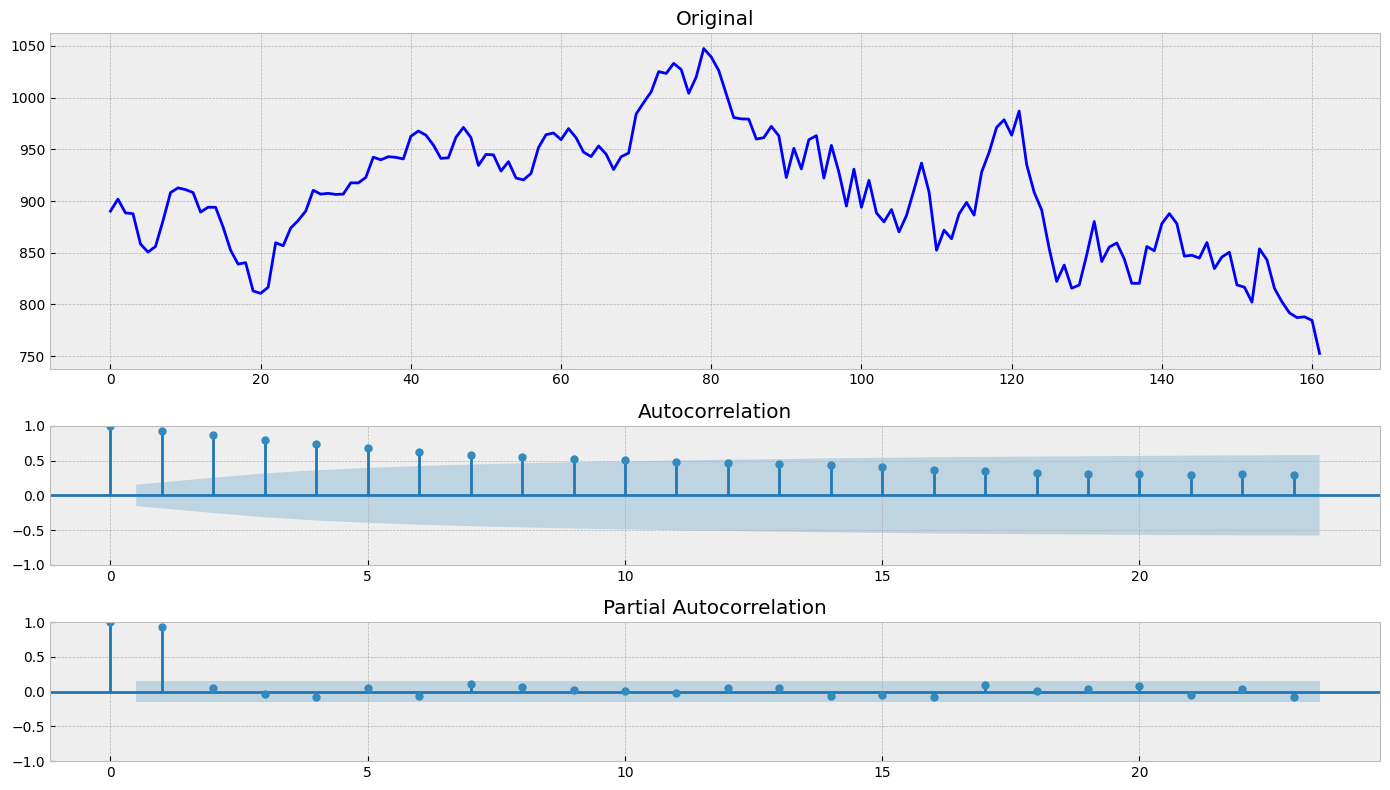

In [ ]:
tsplot(series_1)

In [ ]:
series_1 = boxcox(series_1, 0)
series_1 = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


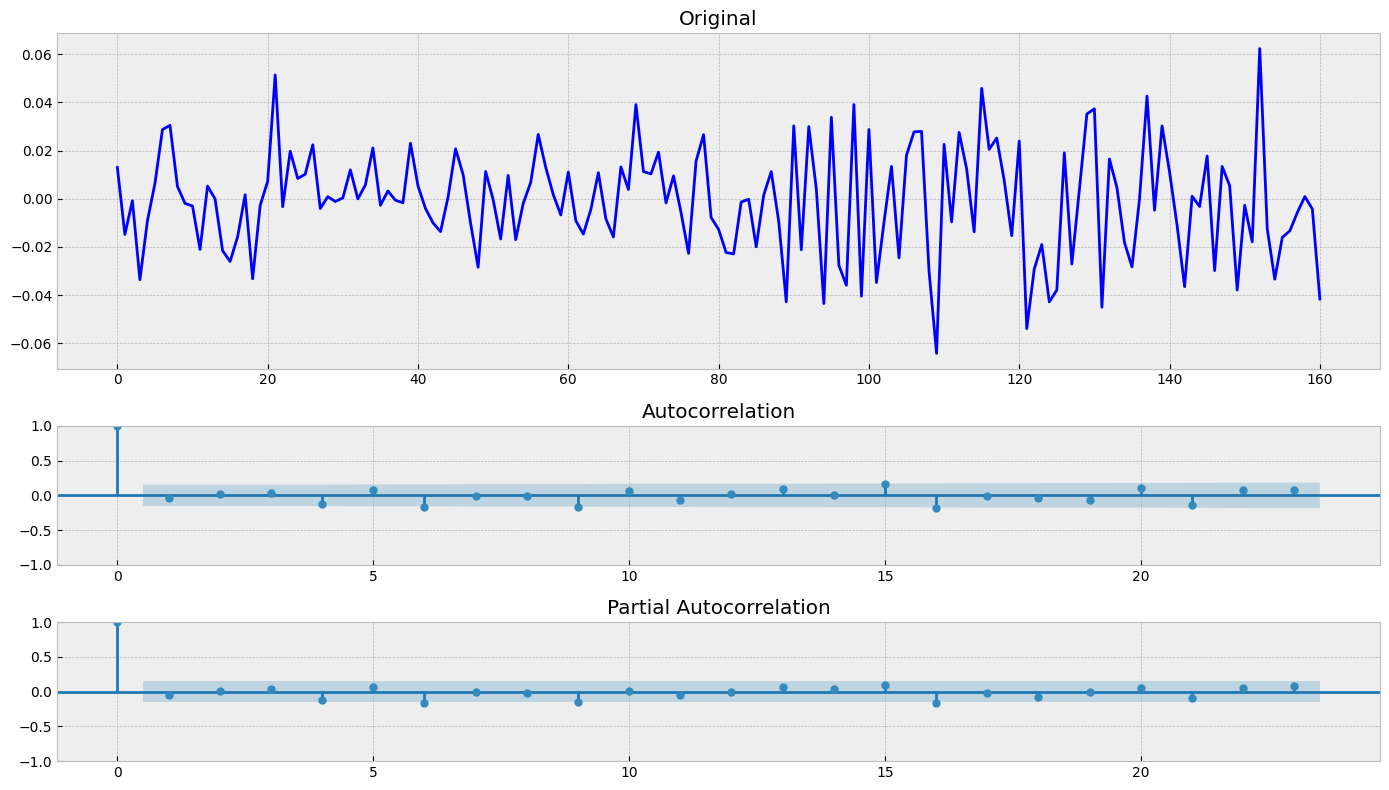

In [ ]:
tsplot(series_1)

Выраженного тренда нет, как и сезонности с цикличностью. Значение p-value подтверждает гипотезу о стационарности ряда

# **daily_total_female_births_in_cal**

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


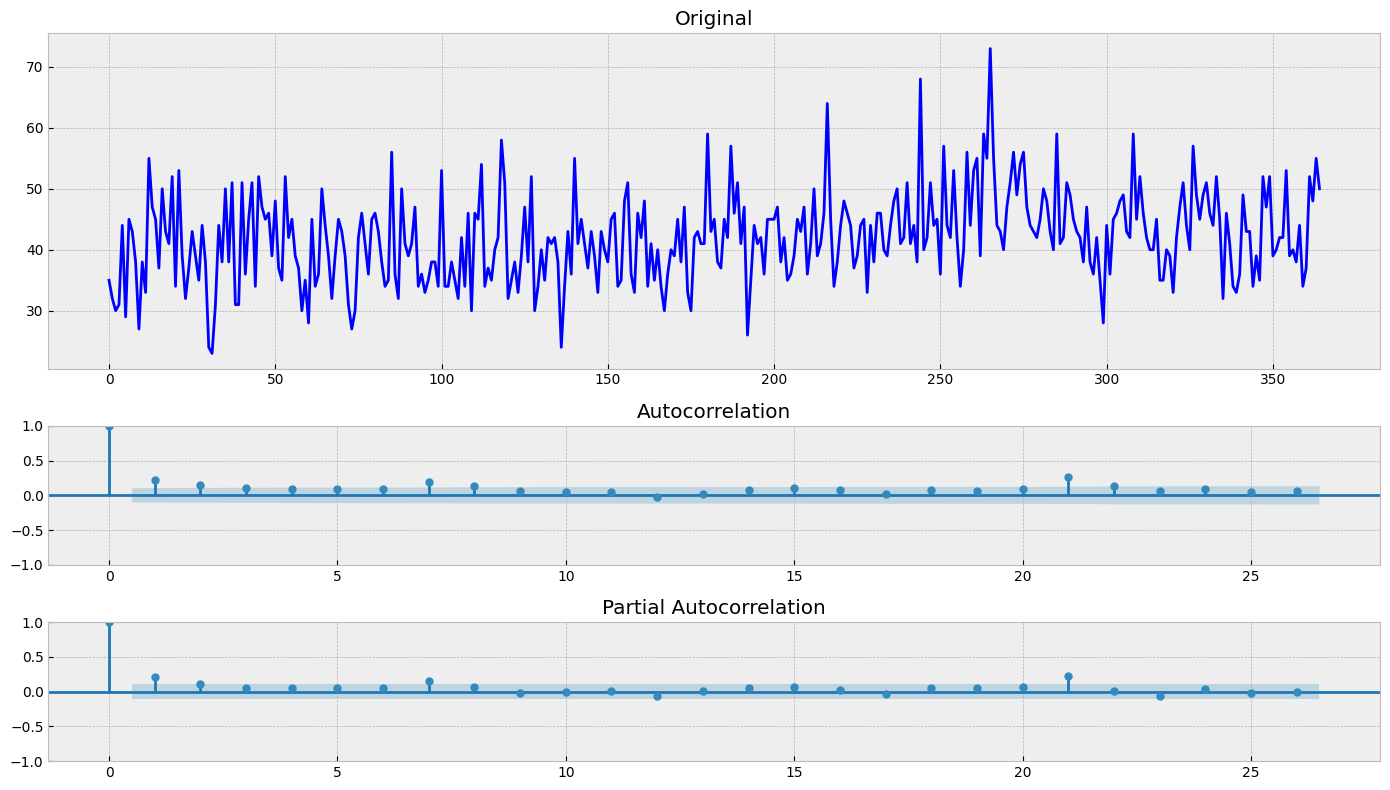

In [ ]:
tsplot(series_2)

Ряд уже стационарен

# **international_airline_passengers**

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


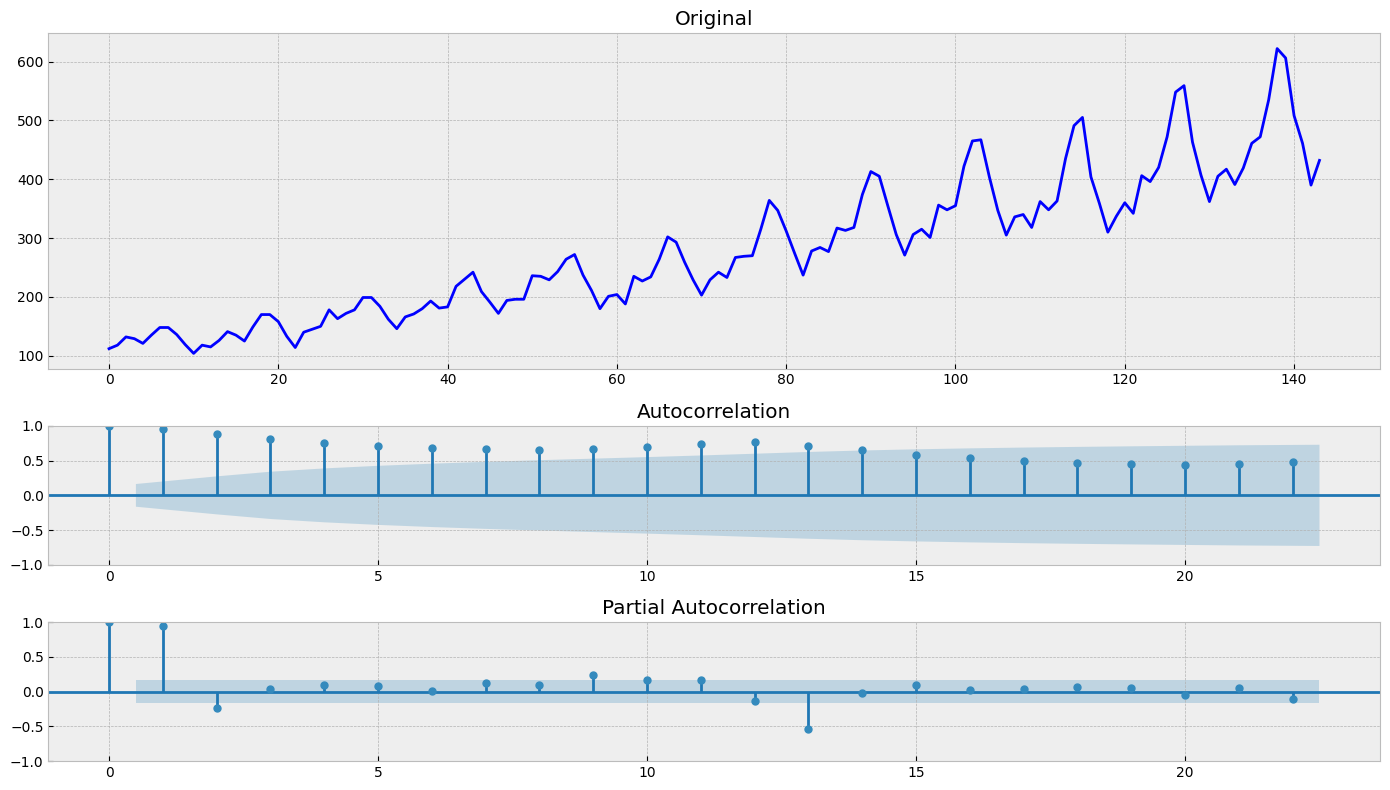

In [ ]:
tsplot(series_3)

In [ ]:
series_3 = boxcox(series_3, 0)
series_3 = series_3[1:] - series_3[:-1]
series_3 = series_3[12:] - series_3[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


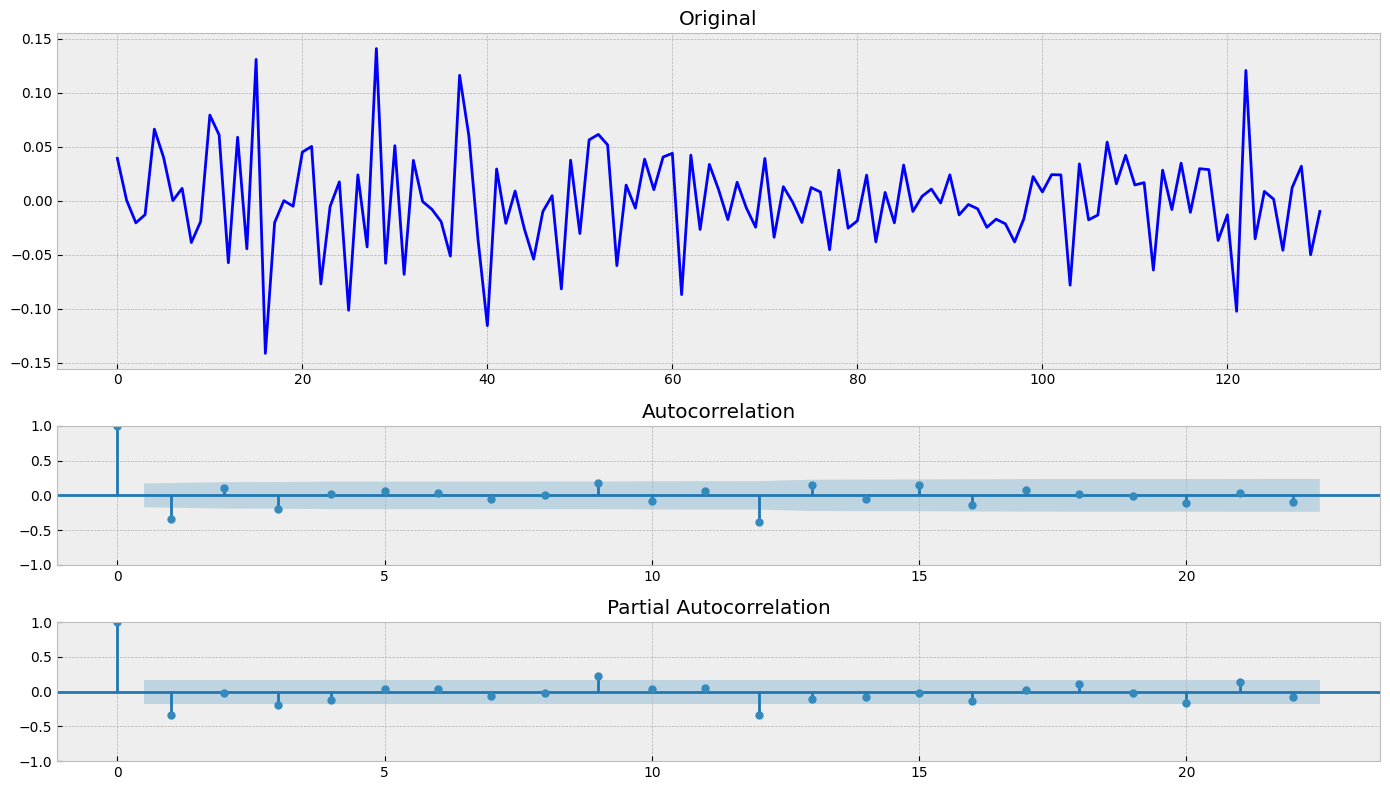

In [ ]:
tsplot(series_3)

Задание было рассмотрено в качестве примера

# **mean_monthly_air_temperature_deg**

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


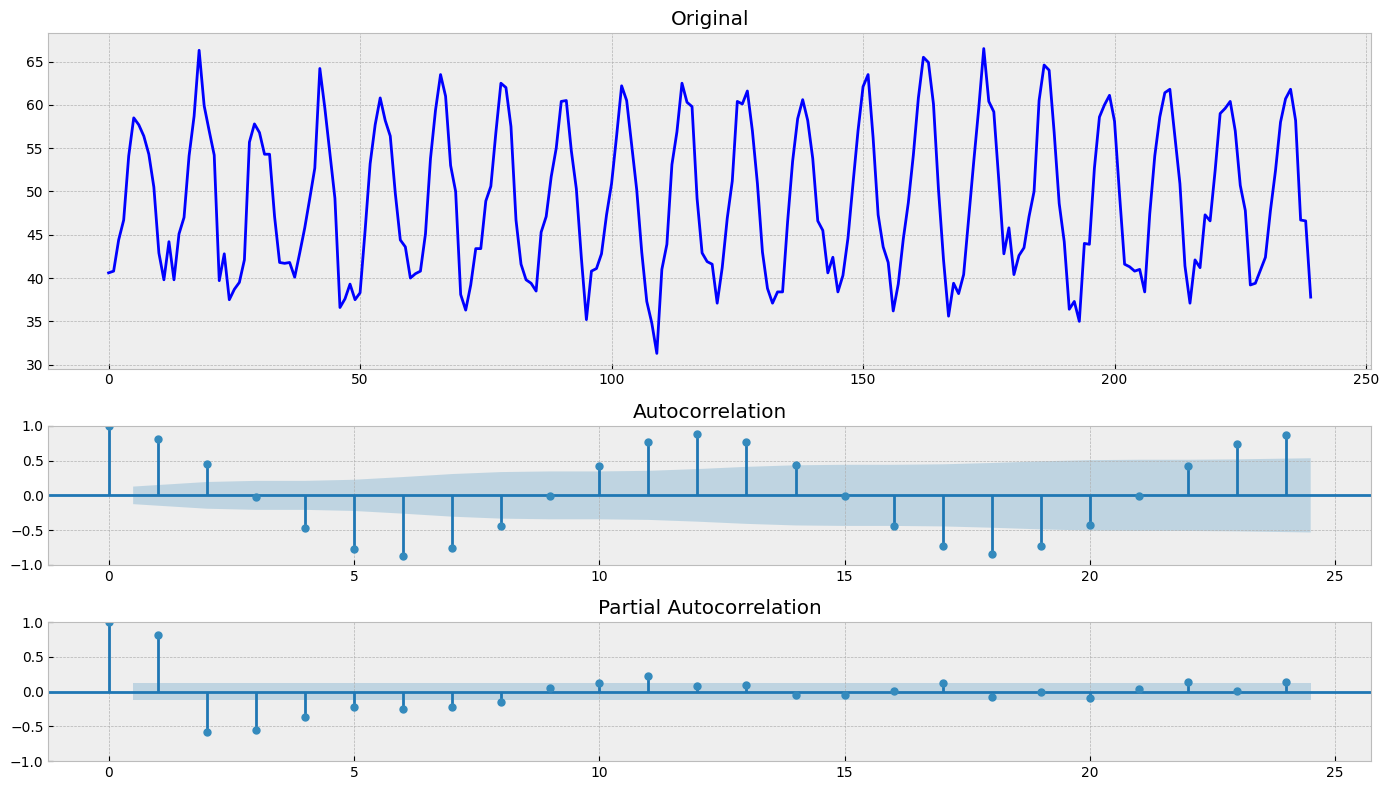

In [ ]:
tsplot(series_4)

В целом согласно тесту ряд уже стационарен. Но попробуем сделать еще более ярко выраженныем

In [ ]:
series_4 = boxcox(series_4, 0)
series_4 = series_4[12:] - series_4[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


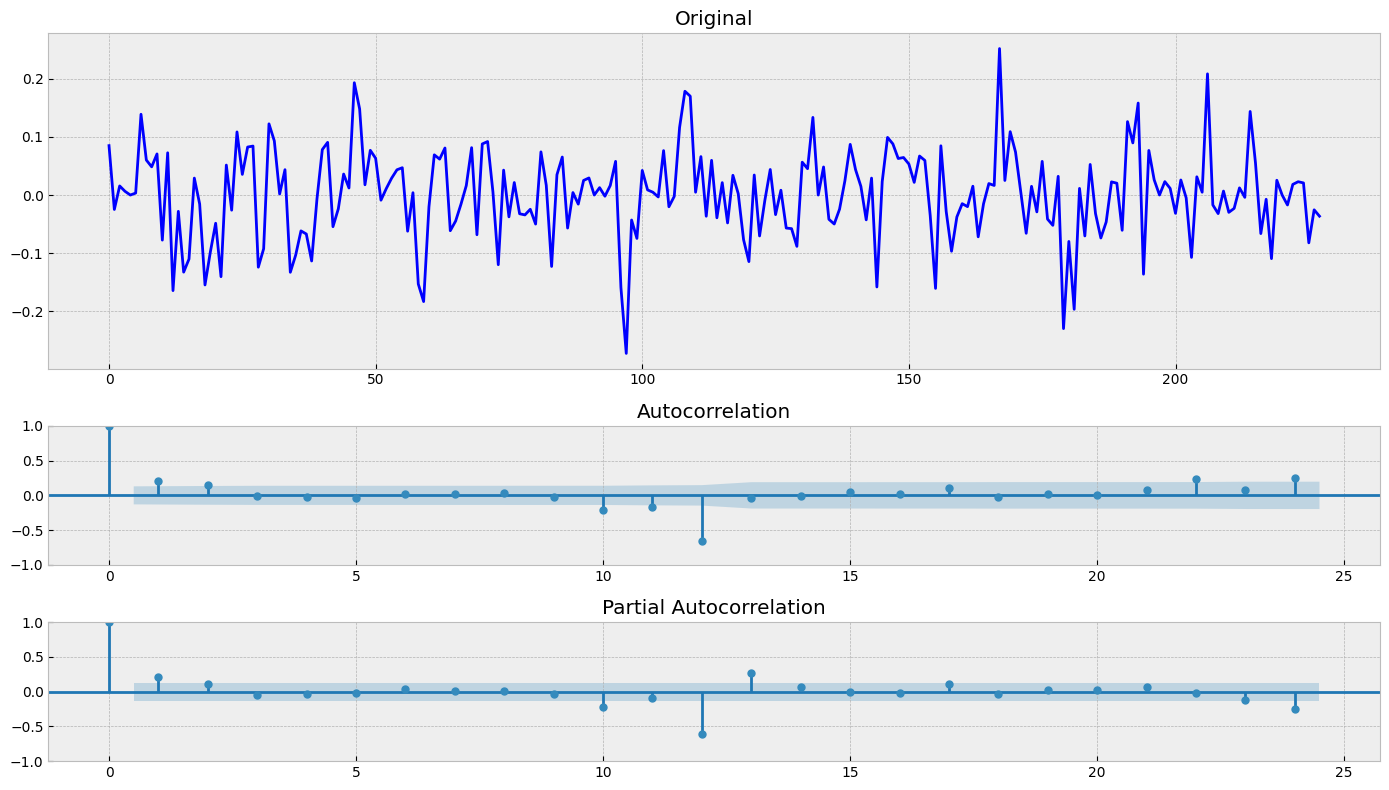

In [ ]:
tsplot(series_4)

# **monthly_boston_armed_robberies_j**

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


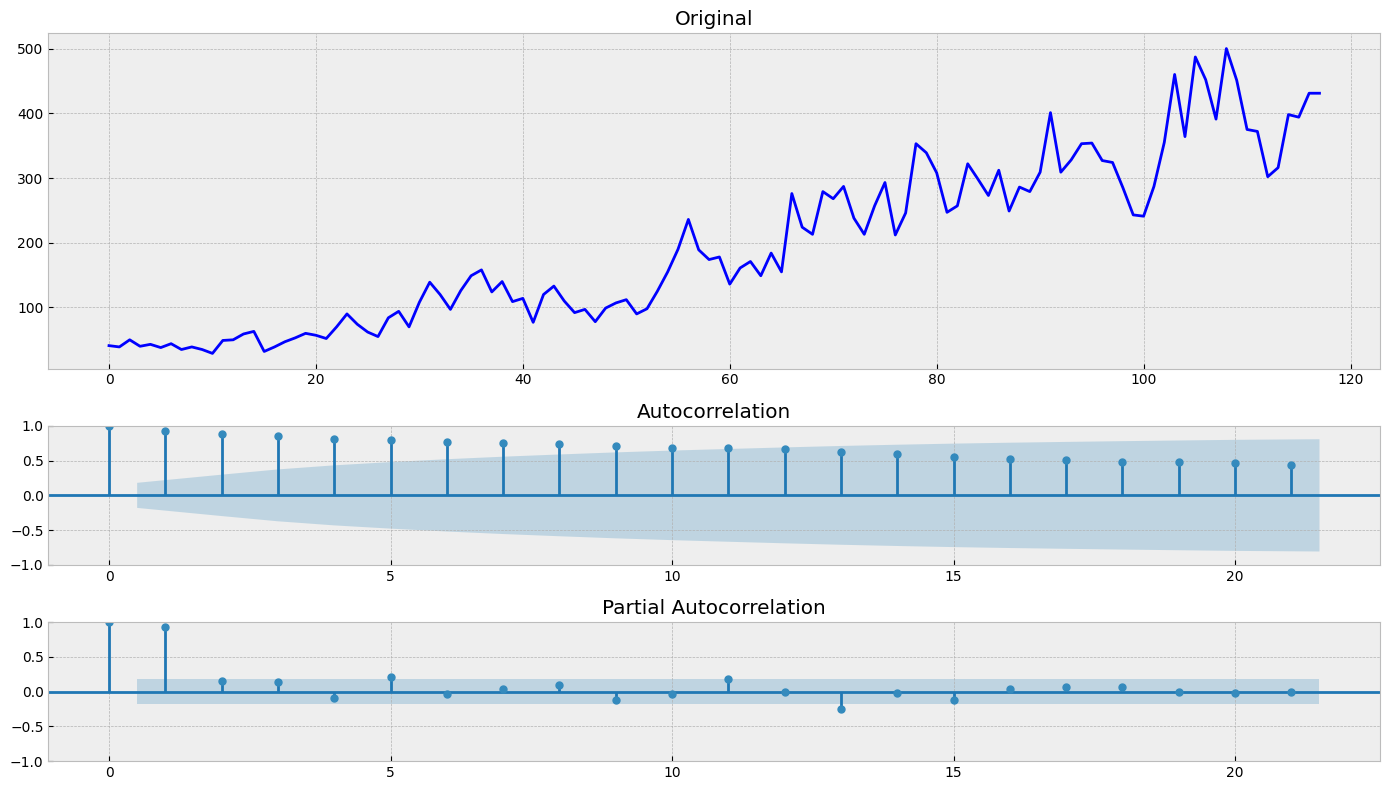

In [ ]:
tsplot(series_5)

In [ ]:
series_5 = np.diff(series_5, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


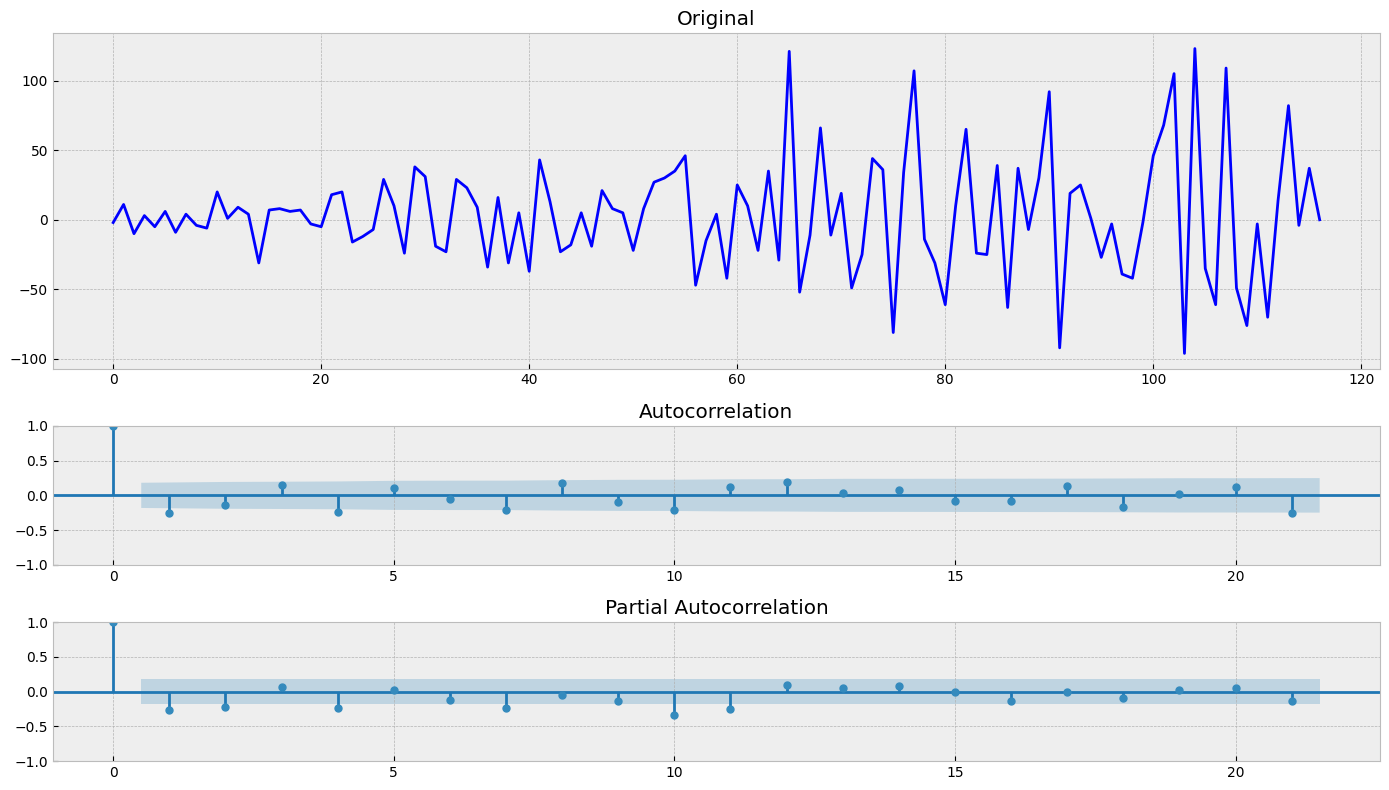

In [ ]:
tsplot(series_5)

# **monthly_sales_of_company_x_jan_6**

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


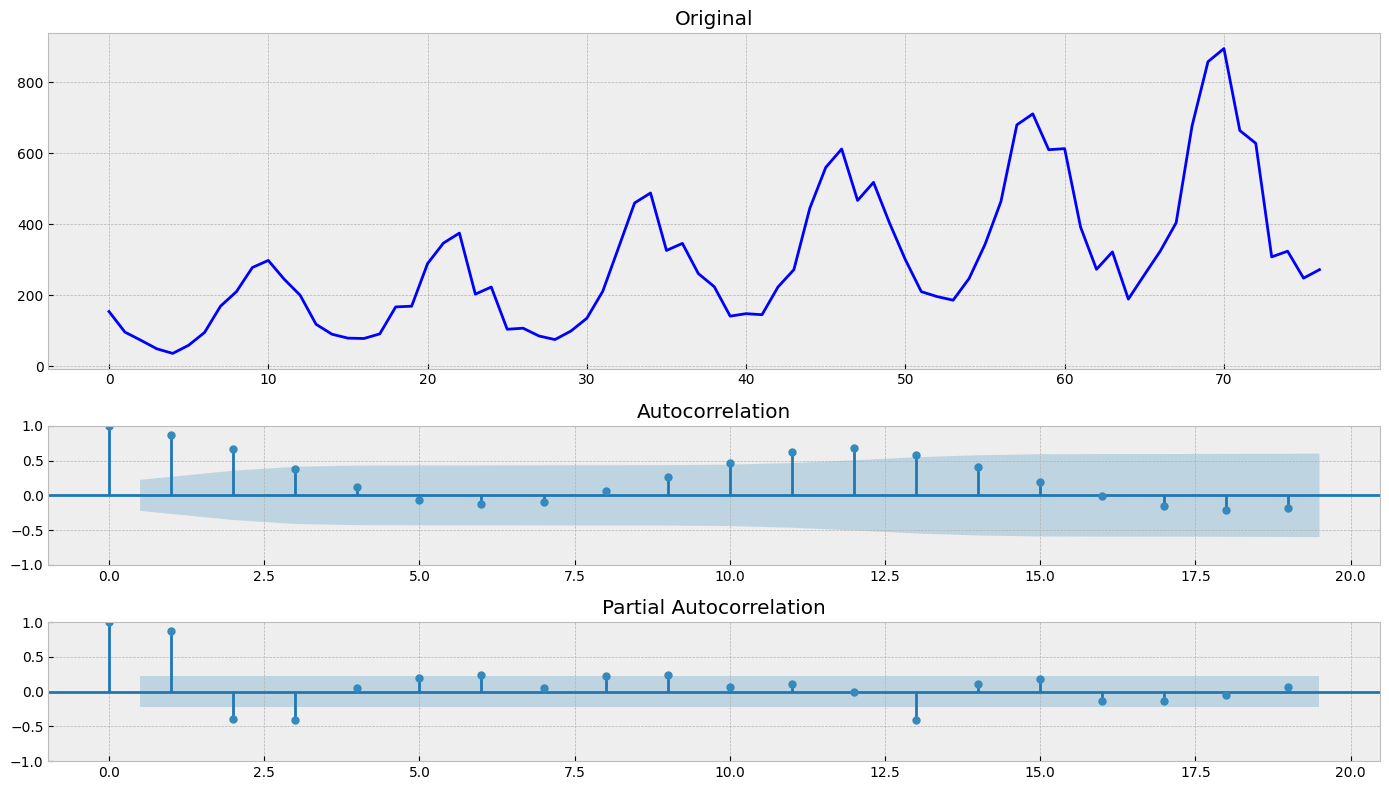

In [ ]:
tsplot(series_6)

In [ ]:
series_6 = boxcox(series_6, 0)
series_6 = np.diff(series_6, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


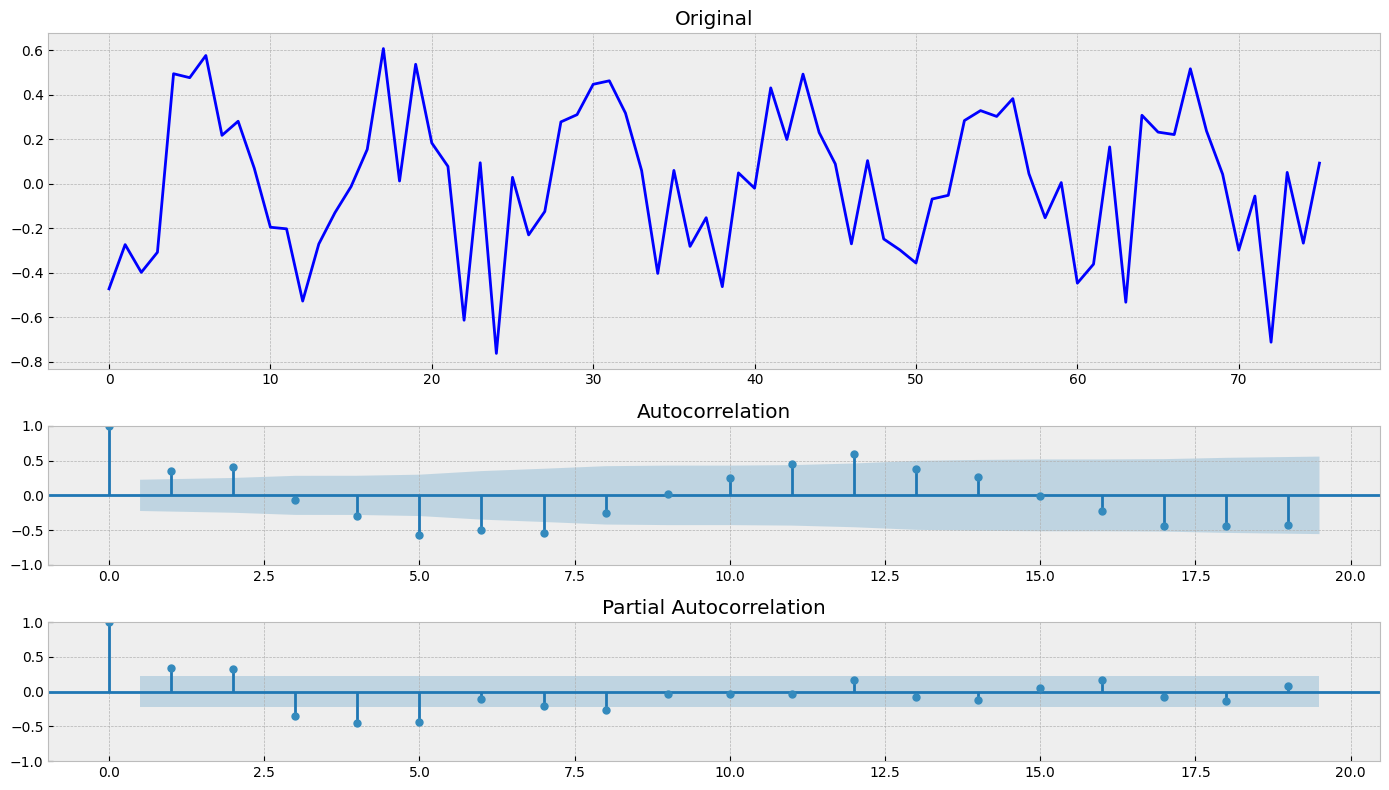

In [ ]:
tsplot(series_6)